La phase de nettoyage du jeu de données inclut la vérification de l'absence de valeurs manquantes pour chaque feature, la standardisation des features numériques, et l'encodage one-hot des variables catégorielles.

In [2]:
import pandas as pd
from google.colab import files

uploaded = files.upload()
import io #permet de lire le fichier directement en mémoire
df = pd.read_csv(io.BytesIO(uploaded[list(uploaded.keys())[0]]))

df.head()


df.info()


df.describe()

ModuleNotFoundError: No module named 'google.colab'

In [ ]:

df.isnull().sum()


(df.isnull().sum() / len(df)) * 100

,0
Age,0.0
Gender,0.0
Occupation,0.0
Marital_Status,0.0
Sleep_Duration,0.0
Sleep_Quality,0.0
Wake_Up_Time,0.0
Bed_Time,0.0
Physical_Activity,0.0
Screen_Time,0.0


In [ ]:
df["Stress_Detection"].value_counts(normalize=True) * 100

,proportion
Stress_Detection,
Medium,40.103493
High,38.939198
Low,20.957309


In [ ]:
from sklearn.utils import resample

df_low = df[df["Stress_Detection"] == "Low"]
df_med = df[df["Stress_Detection"] == "Medium"]
df_high = df[df["Stress_Detection"] == "High"]

df_med_down = resample(df_med, replace=False, n_samples=len(df_low))
df_high_down = resample(df_high, replace=False, n_samples=len(df_low))

df_balanced = pd.concat([df_low, df_med_down, df_high_down])
print(df_balanced)

     Age  Gender             Occupation Marital_Status  Sleep_Duration  \
0     30    Male      Software Engineer         Single             7.0   
3     35    Male      Software Engineer         Single             7.0   
4     29  Female                Teacher         Single             8.0   
11    28  Female     Research Assistant         Single             7.0   
13    34  Female                Teacher        Married             8.0   
..   ...     ...                    ...            ...             ...   
262   45    Male  Electrical Technician         Single             7.0   
327   37  Female           Psychologist        Married             6.2   
5     45    Male                 Doctor        Married             6.0   
15    50  Female              Physician       Divorced             6.5   
745   36    Male      Software Engineer        Married             6.3   

     Sleep_Quality Wake_Up_Time  Bed_Time  Physical_Activity  Screen_Time  \
0              4.0      7:00 AM  1

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder


df = pd.read_csv('stress_detection_data.csv')


cat_cols = ['Gender', 'Occupation', 'Marital_Status',
            'Smoking_Habit', 'Meditation_Practice', 'Exercise_Type']


for col in cat_cols:
    df[f'{col}_original'] = df[col]


ohe = OneHotEncoder(sparse_output=False, drop=None, handle_unknown='ignore')


encoded_data = ohe.fit_transform(df[cat_cols])


encoded_cols = ohe.get_feature_names_out(cat_cols)


df_encoded = pd.DataFrame(encoded_data, columns=encoded_cols, index=df.index)


df = df.drop(columns=cat_cols)
df = pd.concat([df, df_encoded], axis=1)


print(df[[f'{col}_original' for col in cat_cols] + list(encoded_cols)].head(5))


df.to_csv('stress_detection_data_encoded.csv', index=False)

  Gender_original Occupation_original Marital_Status_original  \
0            Male   Software Engineer                  Single   
1          Female   Marketing Manager                 Married   
2            Male      Data Scientist                Divorced   
3            Male   Software Engineer                  Single   
4          Female             Teacher                  Single   

  Smoking_Habit_original Meditation_Practice_original Exercise_Type_original  \
0                     No                          Yes                 Cardio   
1                     No                           No                   Yoga   
2                     No                          Yes      Strength Training   
3                     No                          Yes                 Cardio   
4                     No                          Yes                   Yoga   

   Gender_Female  Gender_Male  Occupation_Account Manager  \
0            0.0          1.0                         0.0   
1     

In [ ]:
def time_to_minutes(t):
    import datetime
    if pd.isnull(t):
        return np.nan
    try:
        x = pd.to_datetime(t)
        return x.hour*60 + x.minute
    except:
        return np.nan

df['Wake_Up_Time_original'] = df['Wake_Up_Time']
df['Wake_Up_Time'] = df['Wake_Up_Time'].apply(time_to_minutes)
print(df[['Wake_Up_Time_original','Wake_Up_Time']].head(5))

df.to_csv('stress_detection_data_encoded.csv', index=False)

  Wake_Up_Time_original  Wake_Up_Time
0               7:00 AM           420
1               6:00 AM           360
2               7:00 AM           420
3               7:00 AM           420
4               6:30 AM           390


In [ ]:
def time_to_minutes(t):
    import datetime
    if pd.isnull(t):
        return np.nan
    try:
        x = pd.to_datetime(t)
        return x.hour*60 + x.minute
    except:
        return np.nan


df['Bed_Time_original'] = df['Bed_Time']
df['Bed_Time'] = df['Bed_Time'].apply(time_to_minutes)

print(df[['Bed_Time_original','Bed_Time']].head(5))
df.to_csv('stress_detection_data_encoded.csv', index=False)

  Bed_Time_original  Bed_Time
0          10:00 PM      1320
1          11:00 PM      1380
2          10:00 PM      1320
3          10:00 PM      1320
4          10:30 PM      1350


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Sleep_Duration', 'Sleep_Quality', 'Physical_Activity',
                'Screen_Time', 'Caffeine_Intake', 'Alcohol_Intake',
                'Work_Hours', 'Travel_Time', 'Social_Interactions',
                'Blood_Sugar_Level', 'Cholesterol_Level']

for col in numeric_cols:
    df[f'{col}_original'] = df[col]
    df[col] = scaler.fit_transform(df[[col]])
df.to_csv('stress_detection_data_encoded.csv', index=False)

In [ ]:
import pandas as pd


df = pd.read_csv("stress_detection_data_encoded.csv")


df['Stress_Detection_original'] = df['Stress_Detection']


print("Valeurs uniques avant transformation :", df['Stress_Detection'].unique())

mapping = {'Low': 1, 'Medium': 2, 'High': 3}


df['Stress_Detection'] = df['Stress_Detection'].map(mapping)


print("Valeurs uniques après transformation :", df['Stress_Detection'].unique())

print(df.head())


df.to_csv("stress_detection_data_encoded.csv", index=False)
print("\nLe fichier encodé a été enregistré sous le nom : stress_detection_data_encoded.csv")

Valeurs uniques avant transformation : ['Low' 'Medium' 'High']
Valeurs uniques après transformation : [1 2 3]
   Age  Sleep_Duration  Sleep_Quality  Wake_Up_Time  Bed_Time  \
0   30        0.902427       0.278617           420      1320   
1   35       -0.461625      -1.555888           360      1380   
2   40        0.902427       0.278617           420      1320   
3   35        0.902427       0.278617           420      1320   
4   29        2.266479       2.113122           390      1350   

   Physical_Activity  Screen_Time  Caffeine_Intake  Alcohol_Intake  \
0           -1.22917    -0.129846        -0.977364       -1.319973   
1           -2.48432    -1.361392        -2.170891        0.165237   
2           -1.22917    -0.129846        -0.977364       -1.319973   
3           -1.22917    -0.129846        -0.977364       -1.319973   
4            0.02598    -2.592938        -0.977364       -1.319973   

   Work_Hours  ...  Physical_Activity_original  Screen_Time_original  \
0   -0

In [ ]:
df=pd.read_csv("stress_detection_data_encoded.csv")
df = df[[col for col in df.columns if not col.endswith("_original")]]
[col for col in df.columns if col.endswith("_original")]
df.head(20)



,Age,Sleep_Duration,Sleep_Quality,Wake_Up_Time,Bed_Time,Physical_Activity,Screen_Time,Caffeine_Intake,Alcohol_Intake,Work_Hours,...,Smoking_Habit_Yes,Meditation_Practice_No,Meditation_Practice_Yes,Exercise_Type_Aerobics,Exercise_Type_Cardio,Exercise_Type_Meditation,Exercise_Type_Pilates,Exercise_Type_Strength Training,Exercise_Type_Walking,Exercise_Type_Yoga
0,30,0.902427,0.278617,420,1320,-1.229170,-0.129846,-0.977364,-1.319973,-0.243288,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,35,-0.461625,-1.555888,360,1380,-2.484320,-1.361392,-2.170891,0.165237,0.697021,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,40,0.902427,0.278617,420,1320,-1.229170,-0.129846,-0.977364,-1.319973,-0.243288,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,35,0.902427,0.278617,420,1320,-1.229170,-0.129846,-0.977364,-1.319973,-0.243288,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,29,2.266479,2.113122,390,1350,0.025980,-2.592938,-0.977364,-1.319973,-1.183598,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5,45,-0.461625,-1.555888,330,1380,-1.229170,-0.129846,0.216163,0.165237,1.637331,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,32,0.902427,0.278617,420,0,-2.484320,2.333246,1.409689,-1.319973,0.697021,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,37,1.584453,0.278617,360,1350,-0.601595,-0.745619,0.216163,-1.319973,-0.243288,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,50,-1.143651,-3.390393,300,30,-1.229170,4.796338,1.409689,1.650447,3.517951,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,40,-0.461625,-1.555888,360,1410,0.025980,0.485927,0.216163,-1.319973,0.697021,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


Partie de visualisation des données :Visualisation des lignes du dataset selon Stress_Detection (variable cible), boîtes à moustaches, diagramme de répartition du niveau de stress et matrice de corrélation entre variables.

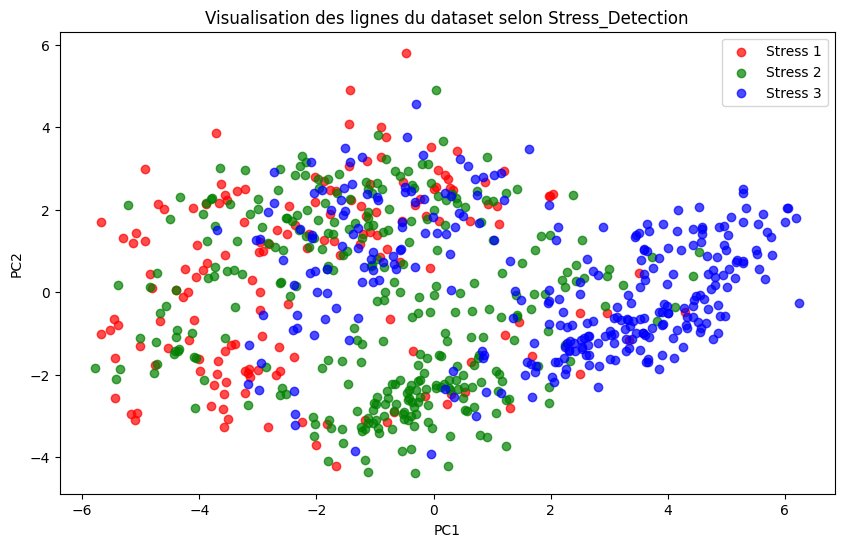

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X = df.drop("Stress_Detection", axis=1)
y = df["Stress_Detection"]

X = pd.get_dummies(X)


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


plt.figure(figsize=(10,6))
colors = {1: 'red', 2: 'green', 3: 'blue'}

for classe in y.unique():
    plt.scatter(
        X_pca[y==classe, 0],
        X_pca[y==classe, 1],
        c=colors[classe],
        label=f'Stress {classe}',
        alpha=0.7
    )

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Visualisation des lignes du dataset selon Stress_Detection')
plt.legend()
plt.show()

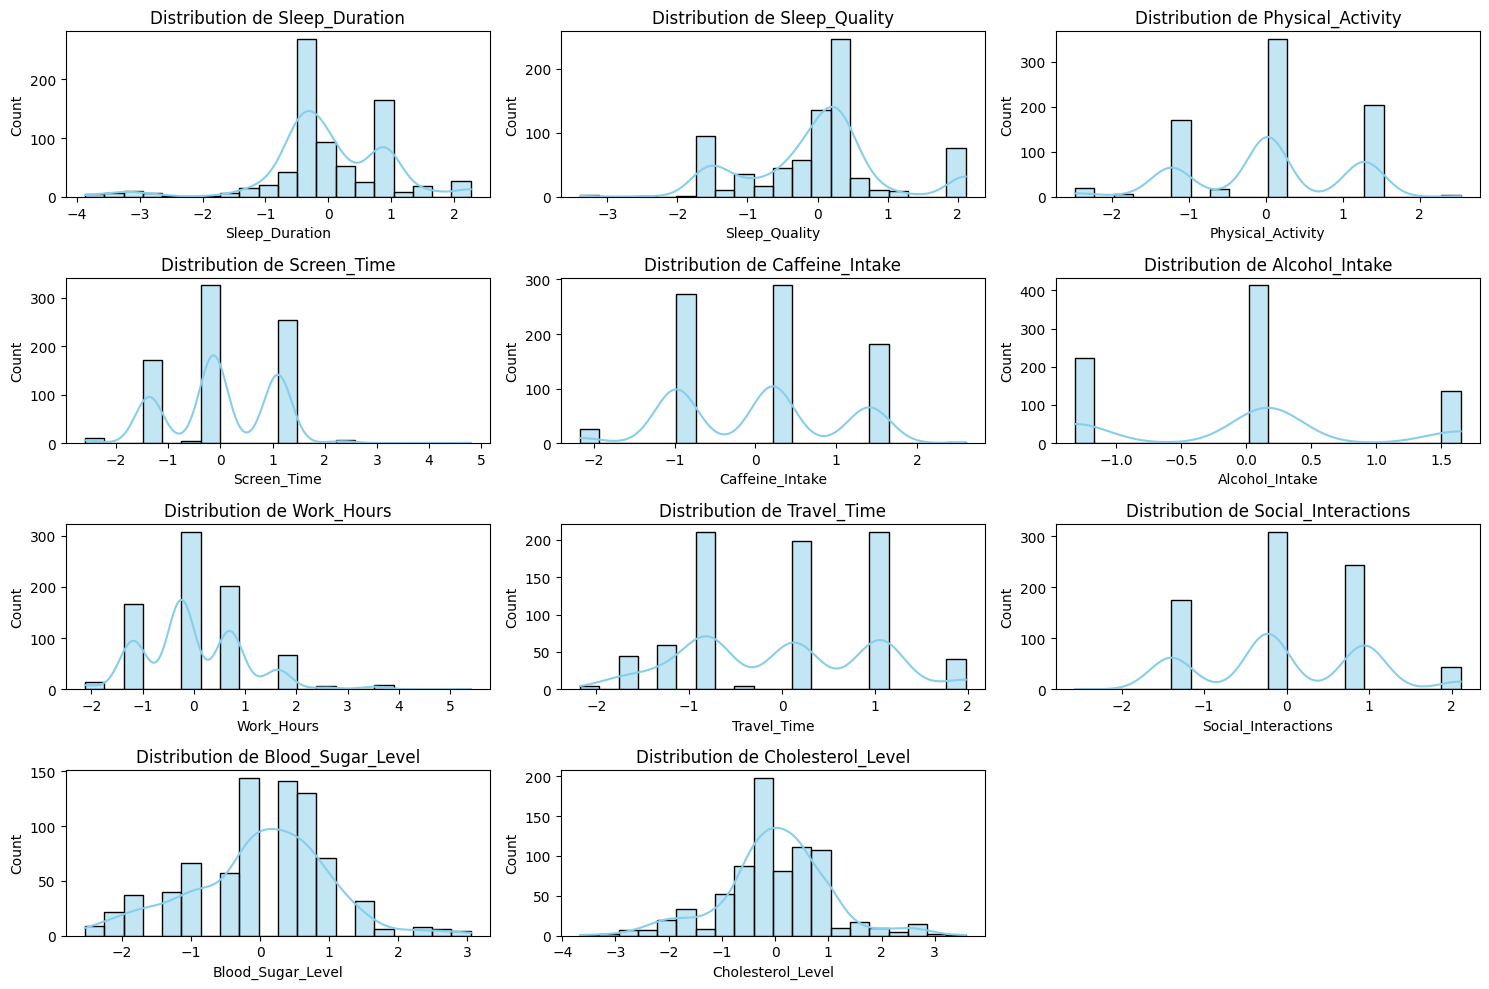

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['Sleep_Duration', 'Sleep_Quality', 'Physical_Activity',
                'Screen_Time', 'Caffeine_Intake', 'Alcohol_Intake',
                'Work_Hours', 'Travel_Time', 'Social_Interactions',
                'Blood_Sugar_Level', 'Cholesterol_Level']

plt.figure(figsize=(15,10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(4,3,i)
    sns.histplot(df[col], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution de {col}')
plt.tight_layout()
plt.show()

In [ ]:

import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import OneHotEncoder, StandardScaler


pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

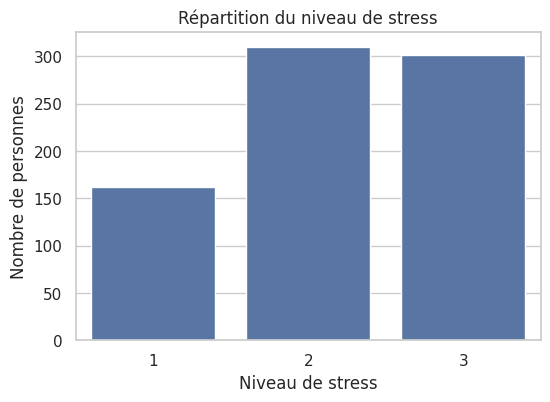

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Stress_Detection', data=df)
plt.title("Répartition du niveau de stress")
plt.xlabel("Niveau de stress")
plt.ylabel("Nombre de personnes")
plt.show()

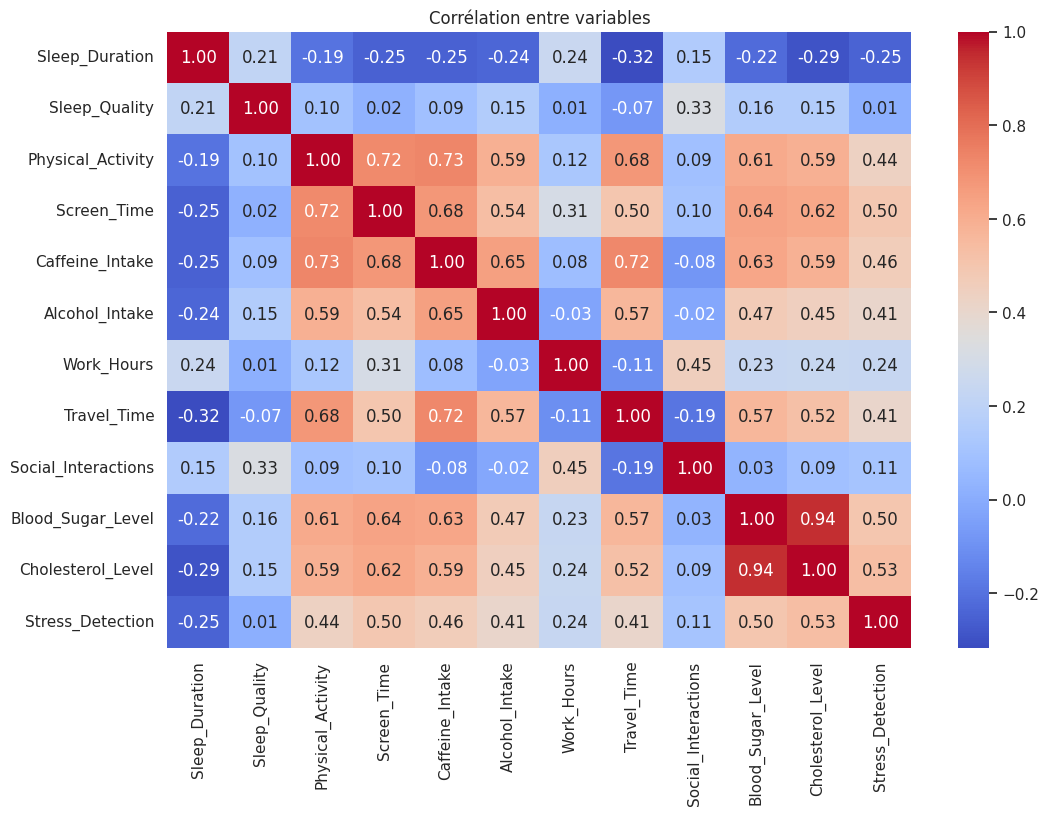

In [ ]:
plt.figure(figsize=(12,8))
corr = df[numeric_cols + ['Stress_Detection']].corr()
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Corrélation entre variables')
plt.show()

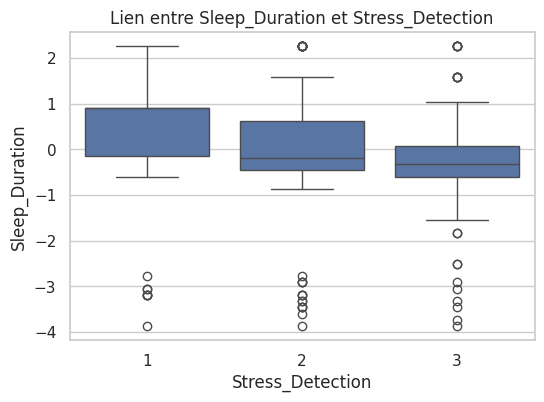

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Stress_Detection', y='Sleep_Duration', data=df)
plt.title("Lien entre Sleep_Duration et Stress_Detection")
plt.show()

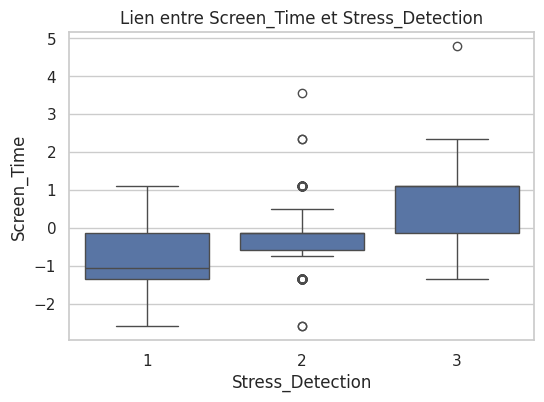

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Stress_Detection', y='Screen_Time', data=df)
plt.title("Lien entre Screen_Time et Stress_Detection")
plt.show()

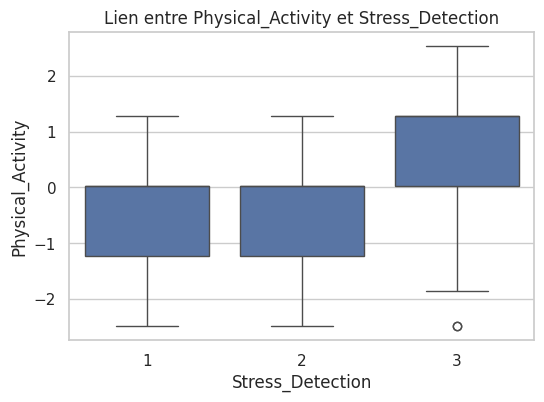

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Stress_Detection', y='Physical_Activity', data=df)
plt.title("Lien entre Physical_Activity et Stress_Detection")
plt.show()

Entraînement d’un modèle de prédiction de stress par régression logistique avec 1 000 itérations, et visualisation des métriques d’évaluation, de la matrice de confusion, de la courbe ROC et de la courbe d’apprentissage

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

X = df.drop('Stress_Detection', axis=1)


y = df['Stress_Detection']


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)



model = LogisticRegression(
    multi_class='multinomial',
    solver='lbfgs',
    max_iter=1000
)

model.fit(X_train, y_train)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, multi_class='multinomial')

Accuracy: 0.6967741935483871
              precision    recall  f1-score   support

           1       0.79      0.45      0.58        33
           2       0.64      0.76      0.70        62
           3       0.73      0.77      0.75        60

    accuracy                           0.70       155
   macro avg       0.72      0.66      0.67       155
weighted avg       0.71      0.70      0.69       155



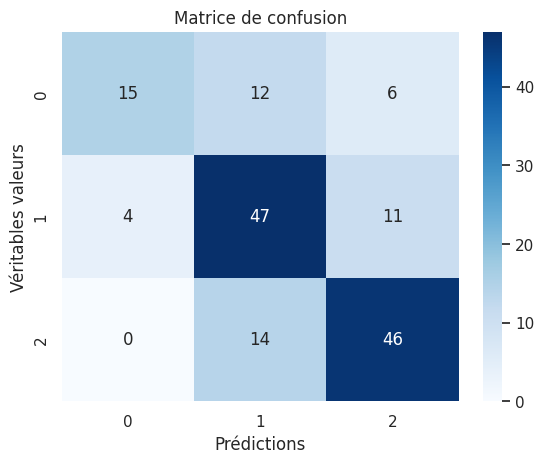

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Prédictions')
plt.ylabel('Véritables valeurs')
plt.title('Matrice de confusion')
plt.show()

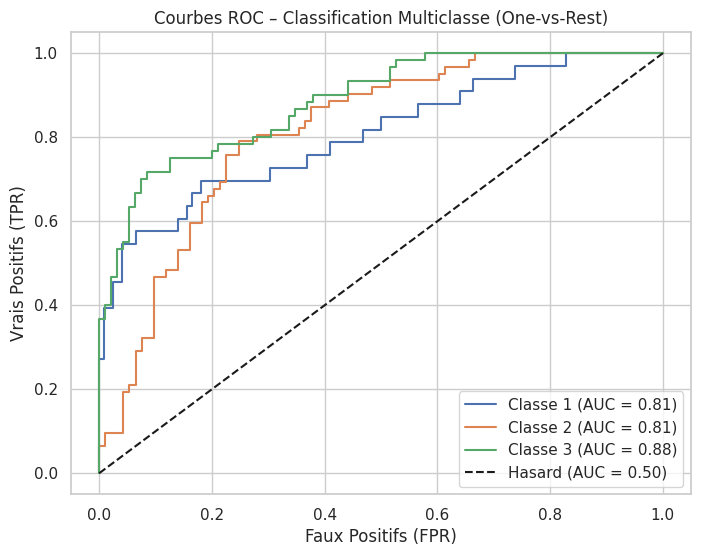

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import numpy as np


classes = [1, 2, 3]
y_test_binarized = label_binarize(y_test, classes=classes)


y_score = model.predict_proba(X_test)


plt.figure(figsize=(8,6))

for i, class_id in enumerate(classes):
    fpr, tpr, thresholds = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f'Classe {class_id} (AUC = {roc_auc:.2f})')


plt.plot([0, 1], [0, 1], 'k--', label='Hasard (AUC = 0.50)')
plt.xlabel('Faux Positifs (FPR)')
plt.ylabel('Vrais Positifs (TPR)')
plt.title('Courbes ROC – Classification Multiclasse (One-vs-Rest)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


Top 15 des features les plus importantes :
Work_Hours                         0.415918
Cholesterol_Level                  0.343718
Alcohol_Intake                     0.290481
Exercise_Type_Pilates              0.253772
Exercise_Type_Strength Training    0.232052
Blood_Sugar_Level                  0.209426
Physical_Activity                  0.204590
Gender_Male                        0.202491
Gender_Female                      0.192447
Meditation_Practice_No             0.187337
Sleep_Quality                      0.181949
Marital_Status_Married             0.180381
Meditation_Practice_Yes            0.177293
Marital_Status_Single              0.176072
Exercise_Type_Cardio               0.167975
dtype: float64


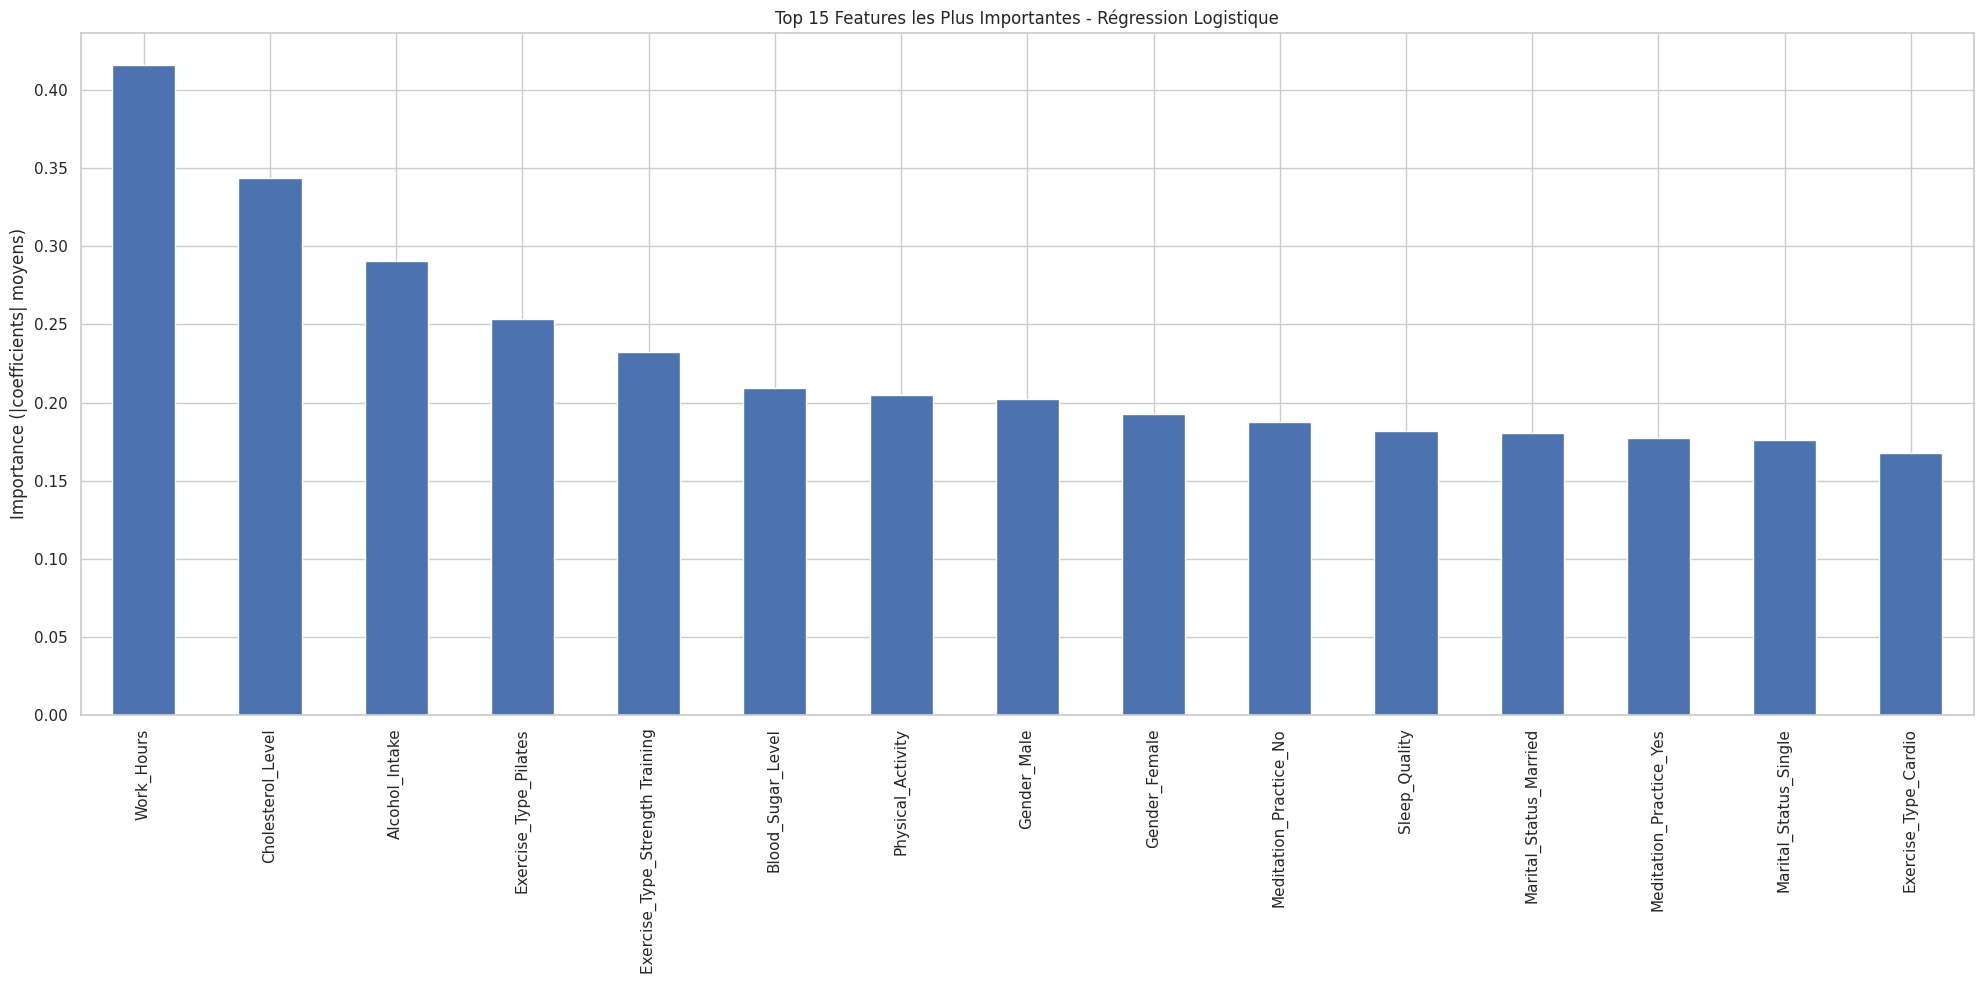

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt


coef = model.coef_
features = X.columns


importance = pd.DataFrame(coef, columns=features).abs().mean()


top10 = importance.sort_values(ascending=False).head(15)

print("\nTop 15 des features les plus importantes :")
print(top10)


plt.figure(figsize=(20, 10))
top10.plot(kind='bar')
plt.title("Top 15 Features les Plus Importantes - Régression Logistique")
plt.ylabel("Importance (|coefficients| moyens)")
plt.tight_layout()
plt.show()

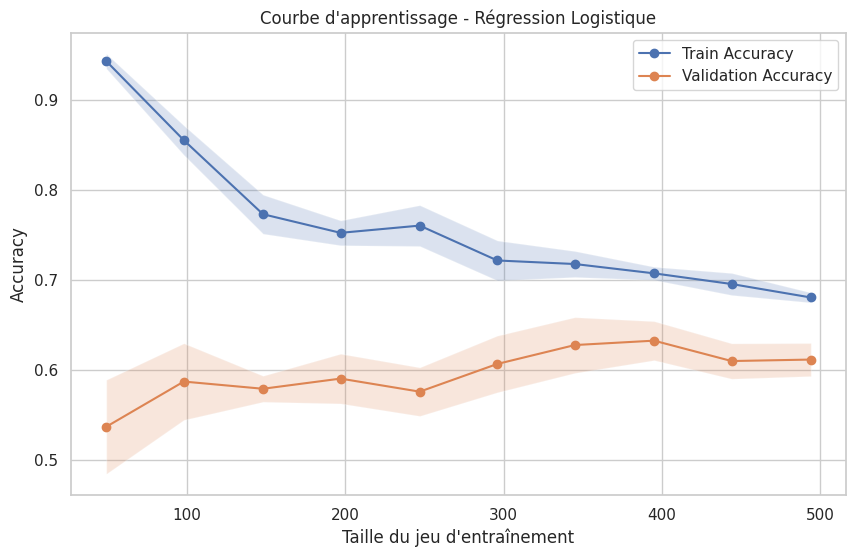

In [ ]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt
import numpy as np


train_sizes, train_scores, test_scores = learning_curve(
    model,
    X_train,
    y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 10),
    scoring='accuracy',
    n_jobs=-1
)


train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)


plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Train Accuracy", marker='o')
plt.plot(train_sizes, test_scores_mean, label="Validation Accuracy", marker='o')


plt.fill_between(train_sizes,
                 train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std,
                 alpha=0.2)

plt.fill_between(train_sizes,
                 test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std,
                 alpha=0.2)

plt.title("Courbe d'apprentissage - Régression Logistique")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()

RANDOM FOREST

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import RocCurveDisplay


df = pd.read_csv("stress_detection_data_encoded.csv")
df = df[[col for col in df.columns if not col.endswith("_original")]]

print(df.head())
print(df.dtypes)


In [ ]:
print(df.shape)
print(df.info())
print(df.isnull().sum())


In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr().iloc[:15,:15], annot=False, cmap="coolwarm")
plt.title("Heatmap (partielle) des corrélations")
plt.show()


In [ ]:
df[['Age','Sleep_Duration','Screen_Time','Work_Hours']].hist(figsize=(10,7), bins=20)
plt.tight_layout()
plt.show()


In [ ]:
to_drop = [col for col in df.columns if col.lower() == "stress_detection_num"]
df = df.drop(columns=to_drop, errors="ignore")

# Définir X et y
X = df.drop(columns=["Stress_Detection"])
y = df["Stress_Detection"]

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
model_rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

model_rf.fit(X_train, y_train)


In [ ]:
y_pred = model_rf.predict(X_test)

print("Accuracy :", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


In [ ]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matrice de Confusion - Random Forest")
plt.xlabel("Prédictions")
plt.ylabel("Réel")
plt.show()


In [ ]:
importances = model_rf.feature_importances_
indices = np.argsort(importances)[-15:]  # 15 plus importantes

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Top 15 des Variables les Plus Importantes")
plt.xlabel("Importance")
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

y_pred_proba = model_rf.predict_proba(X_test)
auc = roc_auc_score(y_test, y_pred_proba, multi_class="ovr")
print("AUC Score (OvR):", auc)
